This code was *prettifyed* – standardization of code format – using ```code_prettify```. You can install it on your Jupyter notebook by installing ```jupyter_contrib_nbextensions``` following https://jupyter-contrib-nbextensions.readthedocs.io/en/latest/install.html . **Please use it since it removes user-specific formatting styles that can sometimes be painful to parse.** – *The TAs.*

# Problem set 6: solutions

## Exercise 1: Gillespie algorithm

### a) Event with constant rate

Because the event happens randomly with constant rate $k$, the probability that one event occurs during one small time interval $\delta t$ is $k\delta t$. 

Since we know that either 0 or 1 event occurs during $\delta t$, we have $P(1)=k\delta t$ and $P(0)=1-k\delta t$ to ensure normalization. We recognize the Bernoulli distribution with $p=k\delta t$.

Because the event happens randomly with constant rate $k$, the event can happen independently of whether it happened before. In particular, the fact that it happened once between $0$ and $\delta t$ does not affect the probability that one event occurs again between $\delta t$ and $2\delta t$.

### b) Poisson process

Let $N(t)$ the random variable for the number of events that happen between time 0 and time $t$. 

To exploit what we found at the previous question, let us cut the time interval $[0,t]$ in $M=t/\delta t$ small time intervals of duration $\delta t$: these intervals are $[0,\delta t]$, $[\delta t,2\delta t]$, $\dots$, $[(M-1)\delta t,t=M\delta t]$. Then, $N(t)$ is the sum of the number of events that occurred during each of these time intervals.

In each of these time intervals, the number of events that occur is 0 or 1, and it follows the Bernoulli distribution with $p=k\delta t$ (see question a). Thus, to obtain $N(t)$, we draw $M$ times a Bernoulli distribution, which yields a binomial distribution with parameters $M=t/\delta t$ and $p=k\delta t$. 

Because we assume that $\delta t$ is very small, let us consider $\delta t\to 0$: we see that $M\to\infty$ and $p\to 0$ while $Mp=kt$ remains constant. In this regime, the binomial distribution tends to a Poisson distribution with mean $Mp=kt$ (see previous lecture on the Luria-Delbrück experiment). Therefore, the probability distribution of $N(t)$ is the Poisson distribution with mean $kt$:
\begin{equation}
P(N(t)=n)=e^{-kt}\frac{(kt)^{n}}{n!} \quad \forall n \in \mathbb{N} \,. \label{poi} \tag{*}
\end{equation}

### c) First event

Let us consider $t$ such that $0<t<T$. Since $T$ denotes the first time after time 0 when the event happens (note that $T$ is a random variable because the event happens at random times), and since $0<t<T$, it means that no event has happened between 0 and $t$, and hence, $N(t)=0$. 

Reciprocally, for $t>0$, if $N(t)=0$, it means that no event has happened between 0 and $t$, and hence, we have $0<t<T$. 

We have shown that for $t>0$, $N(t)=0$ is equivalent to $t<T$. Therefore, $P(T>t)=P(N(t)=0)$. 

Using Eq. $\ref{poi}$ above, we have $P(N(t)=0)=e^{-kt}$, and thus, we have
\begin{equation}
P(T>t)=e^{-kt}\,.
\end{equation}

### d) Probability density of the first arrival time

The probability density $p(t)$ of the first time when the event happens is such that $P(t<T\leq t+ dt)=p(t)\,dt$. But we have 
\begin{equation}
P(t< T\leq t+ dt)=P(T>t)-P(T>t+ dt)=-\frac{dP(T>t)}{dt}\,dt\,.
\end{equation}
Therefore
\begin{equation}
p(t)=-\frac{dP(T>t)}{dt}=ke^{-kt}\,.
\end{equation}
We recognize an **exponential distribution**.

Here, we just demonstrated a fundamental point of the Gillespie algorithm: at each time point, the time at which the next event happens can just be drawn in an exponential distribution with rate $k$. 

The python pseudo-code simulating the process for a time total_time and keeping track of the number of events is given by:

```python
def pseudo_gillespie_1(total_time, k):
    event = 0
    time = 0
    while time <= total_time:
        time += np.random.exponential(1/k)
        event += 1
    return(event)
```

### e) Two different and independent event types

Assuming that two different and independent events 1 and 2 can happen, one with rate $k_1$ and the other one with rate $k_2$, the probability that one event (whatever its type) occurs in a small time interval $\delta t$ is the sum of the probability that an event of type 1 occurs and of the probability that an event of type 2 occurs. So, it is $k_1\delta t+k_2\delta t=(k_1+k_2)\delta t$. 

Here, we see that the sum of rates, $k_1+k_2$, now plays the part of the unique rate $k$ in the first question. Therefore, we should now draw the time at which the next event, **whatever its type**, occurs, in an exponential distribution with rate $k_1+k_2$.

### f) Choosing the event that happens

Now we know how to figure out **when** the next event happens: we can draw its time of arrival in an exponential distribution with rate $k_1+k_2$. To decide **which** of the two possible events (1 or 2) is the one that happens at this time, we should take into account the fact that they happen proportionally to their rates - if event 1 has a twice larger rate, it will happen twice more often. Therefore, event 1 will happen with probability $k_1/(k_1+k_2)$ and event 2 will happen with probability $k_2/(k_1+k_2)$. These are the only two possibilities, their probabilities sum to 1, so normalization is satisfied.

In a simulation, to choose which event occurs, we can draw a random number $r$ in a uniform distribution between 0 and 1, and compare it to $k_1/(k_1+k_2)$: if $r<k_1/(k_1+k_2)$, then we decide that event 1 occurs, and if $r\geq k_1/(k_1+k_2)$, then we decide that event 2 occurs. 

Indeed, because $r$ is uniformly distributed between 0 and 1, we have for all $x$ between 0 and 1, $P(r<x)=x$ and $P(r\geq x)=1-x$, so this procedure ensures that event 1 occurs with probability $k_1/(k_1+k_2)$ and event 2 with probability $k_2/(k_1+k_2)$.

Here, the python pseudo-code simulating the process for a time total_time and keeping track of the number of events of both types is given by:

```python
def pseudo_gillespie_2(total_time, k1, k2):
    event_1 = 0
    event_2 = 0
    time = 0
    while time <= total_time:
        ktot = k1 + k2
        time += np.random.exponential(1/ktot)
        r = random()
        if r <= k1/ktot:
            event_1 += 1
        else:
            event_2 += 1
    return(event_1, event_2)
```

### g) Gillespie algorithm

To simulate the process and the trajectory of the system (showing the state of the system versus time), we start at time $t=0$ in a given initial state. Then:

1- We pick the **time $t_1$ at which the next event occurs** in an **exponential distribution** with rate the **sum of the rates of all possible events**. 

2- We update time $t$ to $t+t_1$.

3- We choose **which** of the possible events occurs at time $t_1$, by **drawing a random number $r$ in a uniform distribution between 0 and 1** and **comparing it to the ratios of the rate of each event to the sum of the rates of all possible events**. [Note: if there are $n>2$ possible event types, we need to split the interval [0,1[ into sub-intervals $[0,\frac{k_1}{K}[$, $[\frac{k_1}{K},\frac{k_1+k_2}{K}[$, ..., $[\frac{k_1+\dots+k_{n-1}}{K},1[$, and event 1 occurs if $r$ falls in the first of them, event 2 if it falls in the second, ..., and event $n$ if it falls in the last one.] 

4- We perform the event and update the state of the system.

5- We go back to 1 and iterate steps 1 to 4 for the desired amount of time.

## Exercise 2: Simulation of a simple gene expression model and data analysis

### a) Master equation

The set of reactions of the system is:

\begin{eqnarray*}
\emptyset &\xrightarrow[]{k_{RNA}}& RNA\\
RNA &\xrightarrow[]{k_{decay}}& \emptyset
\end{eqnarray*}

The master equation of this system is given by:

\begin{equation}
\frac{d P_n}{d t}=k_{RNA} \times \left[P_{n-1}-P_{n}\right]-k_{decay} \times \left[n\,P_n-\left(n+1\right)P_{n+1}\right] \quad \forall n \in \mathbb{N^*}
\end{equation}

\begin{equation}
\frac{d P_0}{d t}=- k_{RNA} \times P_{0} + k_{decay} \times P_{1} 
\end{equation}

At equilibrium $\frac{d P_n}{d t}=0 \quad \forall n \in \mathbb{N}$ and we have:

\begin{equation}
P_n=e^{-\lambda}\frac{\lambda^n}{n!} \quad \forall n \in \mathbb{N}
\end{equation}

with $\lambda = k_{RNA}/k_{decay}$. It comes that:

\begin{eqnarray*}
\langle RNA \rangle &=& \frac{k_{RNA}}{k_{decay}} \\
Var(RNA) &=& \frac{k_{RNA}}{k_{decay}} \\
FF &\doteq& \frac{Var(RNA)}{\langle RNA \rangle} = 1
\end{eqnarray*}

### b) Gillespie algorithm

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## Gillespie algorithm using the so-called "direct-method"


def Gillespie(kRNA, kd, tf, RNA0=0):
    List_RNA = [RNA0]
    List_time = [0]
    while List_time[-1] < tf:
        List_rates = [kRNA, kd * List_RNA[-1]]
        sum_rates = np.sum(List_rates)
        List_time += [List_time[-1] + np.random.exponential(1 / sum_rates)
                      ]  #draw a random number exponentially distributed
        random_number = np.random.random(
        )  #draw a random number between 0 and 1
        if random_number <= List_rates[0] / sum_rates:
            #The synthesis event is selected : RNA -> RNA +1
            List_RNA += [List_RNA[-1] + 1]
        elif random_number <= np.sum(List_rates[0:2]) / sum_rates:
            #The degradation event is selected : RNA -> RNA - 1
            List_RNA += [List_RNA[-1] - 1]
        else:
            print("The probabilities should sum to one!!")
    return (List_time, List_RNA)

(0.0, 150.0)

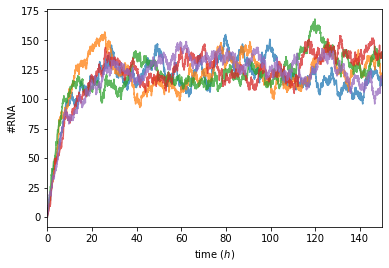

In [3]:
kRNA = 17.370
kd = 0.1368
tf = 150
RNA0 = 0

for k in range(5):
    List_time, List_RNA = Gillespie(kRNA, kd, tf, RNA0)
    plt.plot(List_time, List_RNA, alpha=0.75)
plt.xlabel(r'time ($h$)')
plt.ylabel(r'#RNA')
plt.xlim(0, tf)

### c) Store only final timepoint

In [4]:
## Gillespie's algorithm using the so-called "direct-method":
# storing only the endpoint to have faster computation


def Gillespie_endpoint(kRNA, kd, tf, RNA0=0):
    RNA = RNA0
    time = 0
    while time < tf:
        RNAold = RNA  # this is a dummy variable to ensure we are returning #RNA at time t=tf
        List_rates = [kRNA, kd * RNA]
        sum_rates = np.sum(List_rates)
        time += np.random.exponential(
            1 / sum_rates)  #draw a random number exponentially distributed
        random_number = np.random.random(
        )  #draw a random number between 0 and 1
        if random_number <= List_rates[0] / sum_rates:
            #The synthesis event is selected : RNA -> RNA +1
            RNA += 1
        elif random_number <= np.sum(List_rates[0:2]) / sum_rates:
            #The degradation event is selected : RNA -> RNA - 1
            RNA -= 1
    return (RNAold)

In [5]:
#parameters
kRNA = 17.370
kd = 0.1368
tf = 75
RNA0 = 0

Ntraj = 250

List_endpoint = Ntraj * [0]

for traj in range(Ntraj):
    List_endpoint[traj] = Gillespie_endpoint(kRNA, kd, tf, RNA0)

print(r'<RNA> = %s' % np.mean(List_endpoint))
print(r'Var(RNA) = %s' % np.var(List_endpoint))
print(r'FF(RNA) = %s' % (np.var(List_endpoint) / np.mean(List_endpoint)))

<RNA> = 128.408
Var(RNA) = 116.36153599999999
FF(RNA) = 0.9061860320229269


(0.0, 250.0)

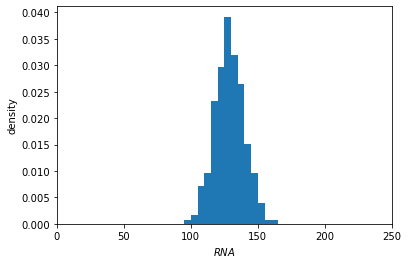

In [6]:
plt.hist(List_endpoint, bins=50, range=(0, 250), density=True)
plt.xlabel(r'$RNA$')
plt.ylabel(r'density')
plt.xlim(0, 250)

The expected value for the mean was kRNA/kd:

In [7]:
print(r'Theory <RNA> = %s' %(17.370/0.1368))

Theory <RNA> = 126.97368421052632


It is quite close to the result we obtained by simulations. In addition we expect the same value for the variance, and a Fano factor of 1, which is indeed consistent with the results obtained by the simulation.

### d) Data analysis

In [8]:
data = np.genfromtxt("problem_set6/smFISH_data.csv", skip_header=1, delimiter="\n")

<RNA> = 127.70842332613391
Var(RNA) = 2123.584529479542
FF(RNA) = 16.628382640481455


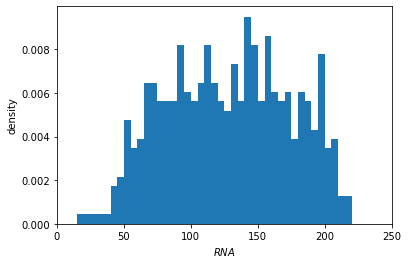

In [9]:
plt.hist(data, bins=50, range=(0, 250), density=True)
plt.xlabel(r'$RNA$')
plt.ylabel(r'density')
plt.xlim(0, 250)

print(r'<RNA> = %s' % np.mean(data))
print(r'Var(RNA) = %s' % np.var(data))
print(r'FF(RNA) = %s' % (np.var(data) / np.mean(data)))

We observe here that the variance is much larger than the mean, and the Fano factor is much larger than 1. Therefore, the data is not consistent with the predictions from the previous model. This motivates the introduction of a more complete model.

## Exercise 3: Modeling gene expression systems beyond the Poisson model

### a) Master equation


The set of reactions for such a system gives:

\begin{eqnarray*}
OFF  &\xrightarrow[]{k_{ON}}& ON \\
ON  &\xrightarrow[]{k_{OFF}}& OFF \\
ON &\xrightarrow[]{k_{RNA}}& ON + RNA\\
RNA &\xrightarrow[]{k_{decay}}& \emptyset
\end{eqnarray*}

The possible states are given by

\begin{equation}
(i,n), i \in \{0,1\}, n \in \mathbb{N}
\end{equation}

with 

\begin{equation}
i = 0 \quad \text{meaning that the gene is inactive} \\
i = 1 \quad \text{meaning that the gene is active}
\end{equation}

and $n$ denoting the number of RNA molecules in the cell. 

To clarify the different possible transitions we can drawn the following scheme:

![title](scheme_problem_set6.png)

In order to write down the master equations, we will study the transition probabilities form states $(0,n)$ and $(1,n)$, i.e decompose the process according to the gene state $i$. 

From state $(0,n)$ the system may transition to:

\begin{equation}
(1,n) \quad \text{with rate} \quad k_{ON} \\
(0,n-1) \quad \text{with rate} \quad k_{decay}\times n
\end{equation}

From state $(1,n)$ the system may transition to:

\begin{equation}
(0,n) \quad \text{with rate} \quad k_{OFF} \\
(1,n-1)\quad\text{with rate} \quad k_{decay}\times n \\
(1,n+1) \quad \text{with rate} \quad k_{RNA}
\end{equation}

Let $P_{0,n}(t)$ (resp. $P_{1,n}(t)$) be the probability that at time $t$ the gene is inactive (resp. active) and that $n$ molecules of RNA are present. The master equation of this system is given by:

\begin{equation}
\forall n \geq 0 \\
\frac{d P_{0,n}}{d t}= -(k_{ON} + k_{decay} n) P_{0,n}(t) + k_{decay} (n+1) P_{0,n+1}(t) + k_{OFF} P_{1,n}(t)\\
\frac{d P_{1,0}}{d t}= - (k_{OFF} + k_{RNA}) P_{1,0}(t) + k_{decay} P_{1,1}(t) + k_{ON} P_{0,0}(t)
\end{equation}



\begin{equation}
\forall n \geq 1 \\
\frac{d P_{1,n}}{d t}= -(k_{OFF} +  k_{RNA} + k_{decay} n)P_{1,n}(t) + k_{decay}(n+1)P_{1,n+1}(t)+ k_{RNA}P_{1,n-1}(t)+ k_{ON}P_{0,n}(t)
\end{equation}

(reference: Peccoud J. Ycart B. 1995  https://www.sciencedirect.com/science/article/pii/S0040580985710271)


### b) Average RNA number in the random telegraph model

We know that:

\begin{eqnarray*}
\langle RNA \rangle &=& \nu_{ON}\times \frac{k_{RNA}}{k_{decay}} \\
\nu_{ON} &\doteq& \frac{k_{ON}}{k_{ON}+k_{OFF}}
\end{eqnarray*}

$\nu_{ON}$ is the proportion of time in which the gene is in the ON state. In the random telegraph model we observe that:

\begin{eqnarray*}
\langle RNA \rangle &=& \nu_{ON} \times \langle RNA \rangle_{Poisson}
\end{eqnarray*}

So we rescale the average number of RNA molecules found in the equivalent Poisson model (with same $k_{RNA}$ and $k_{decay}$) by proportion of time in which the gene is in the ON state. In other words, in the ON state, the system behaves in the same way as the equivalent Poisson model.  

### c) Gillespie algorithm for the random telegraph model

In [10]:
## Gillespie's algorithm using the so-called "direct-method":
# storing only the endpoint to have faster computation


def Gillespie_endpoint_data(kON, kOFF, kRNA, kd, tf, RNA0=0, ON0=0):
    RNA = RNA0
    ON = ON0
    OFF = 1 - ON0
    time = 0
    while time < tf:
        RNAold = RNA  # this is a dummy variable to ensure we are returning #RNA at time t=tf
        List_rates = [kRNA * ON, kd * RNA, kON * OFF, kOFF * ON]
        sum_rates = np.sum(List_rates)
        time += np.random.exponential(
            1 / sum_rates)  #draw a random number exponentially distributed
        random_number = np.random.random(
        )  #draw a random number between 0 and 1
        if random_number <= List_rates[0] / sum_rates:
            #The synthesis event is selected : RNA -> RNA +1
            RNA += 1
        elif random_number <= np.sum(List_rates[0:2]) / sum_rates:
            #The degradation event is selected : RNA -> RNA - 1
            RNA -= 1
        elif random_number <= np.sum(List_rates[0:3]) / sum_rates:
            #OFF -> ON
            ON += 1
            OFF -= 1
        elif random_number <= np.sum(List_rates[0:4]) / sum_rates:
            #ON -> OFF
            ON -= 1
            OFF += 1
    return (RNAold)

### d) Simulation of the random telegraph model

In [11]:
#parameters
kON = 0.572
kOFF = 0.758
kRNA = 40.389
kd = 0.1368
tf = 75
RNA0 = 0

Ntraj = 500

List_endpoint = Ntraj * [0]

for traj in range(Ntraj):
    List_endpoint[traj] = Gillespie_endpoint_data(kON, kOFF, kRNA, kd, tf)

print(r'<RNA> = %s' % np.mean(List_endpoint))
print(r'Var(RNA) = %s' % np.var(List_endpoint))
print(r'FF(RNA) = %s' % (np.var(List_endpoint) / np.mean(List_endpoint)))

<RNA> = 128.272
Var(RNA) = 1976.7380159999998
FF(RNA) = 15.410518398403392


These results, and in particular the Fano factor, are now consistent with those found in the experimental data (question 1 d).

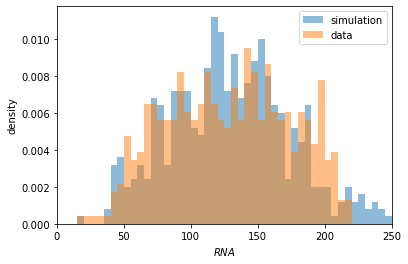

In [12]:
plt.hist(List_endpoint,
         bins=50,
         range=(0, 250),
         density=True,
         alpha=0.5,
         label="simulation")
plt.hist(data, bins=50, range=(0, 250), density=True, alpha=0.5, label="data")
plt.xlabel(r'$RNA$')
plt.ylabel(r'density')
plt.xlim(0, 250)
plt.legend()

### e) If $k_{ON} \gg k_{OFF}$

In [13]:
#parameters
alpha = 20  #scaling factor of kON
kON = 0.572 * alpha
kOFF = 0.758
kRNA = 40.389
kd = 0.1368
tf = 75
RNA0 = 0

Ntraj = 500

List_endpoint_alpha = Ntraj * [0]

for traj in range(Ntraj):
    List_endpoint_alpha[traj] = Gillespie_endpoint_data(
        kON, kOFF, kRNA, kd, tf)

print(r'<RNA> = %s' % np.mean(List_endpoint_alpha))
print(r'Var(RNA) = %s' % np.var(List_endpoint_alpha))
print(r'FF(RNA) = %s' %
      (np.var(List_endpoint_alpha) / np.mean(List_endpoint_alpha)))

<RNA> = 275.494
Var(RNA) = 347.68996400000003
FF(RNA) = 1.2620600230858021


In [14]:
# Poisson simulation
kRNA = 40.389 * kON / (kON + kOFF)  #in order to have the same average #RNA
kd = 0.1368
tf = 75
RNA0 = 0

Ntraj = 500

List_endpoint_poisson = Ntraj * [0]

for traj in range(Ntraj):
    List_endpoint_poisson[traj] = Gillespie_endpoint(
        kRNA, kd, tf)  #calls the code written in 2 c - Poisson model

print(r'<RNA> = %s' % np.mean(List_endpoint_poisson))
print(r'Var(RNA) = %s' % np.var(List_endpoint_poisson))
print(r'FF(RNA) = %s' %
      (np.var(List_endpoint_poisson) / np.mean(List_endpoint_poisson)))

<RNA> = 277.23
Var(RNA) = 266.7091
FF(RNA) = 0.9620499224470654


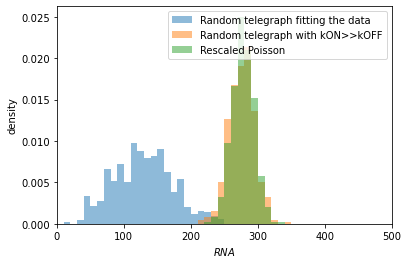

In [15]:
plt.hist(List_endpoint,
         bins=50,
         range=(0, 500),
         density=True,
         alpha=0.5,
         label="Random telegraph fitting the data")
plt.hist(List_endpoint_alpha,
         bins=50,
         range=(0, 500),
         density=True,
         alpha=0.5,
         label="Random telegraph with kON>>kOFF")
plt.hist(List_endpoint_poisson,
         bins=50,
         range=(0, 500),
         density=True,
         alpha=0.5,
         label="Rescaled Poisson")
plt.xlabel(r'$RNA$')
plt.ylabel(r'density')
plt.xlim(0, 500)
plt.legend()

We observe that the results from the simulation of the rescaled Poisson model (which has the same average as the random telegraph model with $k_{ON}\gg k_{OFF}$), match quite well those obtained by simulating this random telegraph model with $k_{ON}\gg k_{OFF}$.

This can be understood analytically. In particular, from question 2 a we know that:

\begin{eqnarray*}
FF &=& 1+\frac{(1-\nu_{ON})\times k_{RNA}}{k_{ON}+k_{OFF}+k_{decay}}
\end{eqnarray*}


Taking the limit $k_{ON}\gg k_{OFF}$ we see that $\nu_{ON} \xrightarrow[]{k_{ON}\gg k_{OFF}} 1$, and thus

\begin{eqnarray*}
FF \xrightarrow[]{k_{ON}\gg k_{OFF}} 1
\end{eqnarray*}

as in the Poissonian model: we confirm analytically our observations made through simulations. 